In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from collections import defaultdict
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
team_ids_names = {1610612737: [['ATL'], ['Atlanta Hawks']],
 1610612738: [['BOS'], ['Boston Celtics']],
 1610612739: [['CLE'], ['Cleveland Cavaliers']],
 1610612740: [['NOH', 'NOK', 'NOP'], ['New Orleans Hornets', 'New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans']],
 1610612741: [['CHI'], ['Chicago Bulls']],
 1610612742: [['DAL'], ['Dallas Mavericks']],
 1610612743: [['DEN'], ['Denver Nuggets']],
 1610612744: [['GSW'], ['Golden State Warriors']],
 1610612745: [['HOU'], ['Houston Rockets']],
 1610612746: [['LAC'], ['Los Angeles Clippers', 'LA Clippers']],
 1610612747: [['LAL'], ['Los Angeles Lakers']],
 1610612748: [['MIA'], ['Miami Heat']],
 1610612749: [['MIL'], ['Milwaukee Bucks']],
 1610612750: [['MIN'], ['Minnesota Timberwolves']],
 1610612751: [['NJN', 'BKN'], ['New Jersey Nets', 'Brooklyn Nets']],
 1610612752: [['NYK'], ['New York Knicks']],
 1610612753: [['ORL'], ['Orlando Magic']],
 1610612754: [['IND'], ['Indiana Pacers']],
 1610612755: [['PHI'], ['Philadelphia 76ers']],
 1610612756: [['PHX'], ['Phoenix Suns']],
 1610612757: [['POR'], ['Portland Trail Blazers']],
 1610612758: [['SAC'], ['Sacramento Kings']],
 1610612759: [['SAS'], ['San Antonio Spurs']],
 1610612760: [['SEA', 'OKC'], ['Seattle SuperSonics', 'Oklahoma City Thunder']],
 1610612761: [['TOR'], ['Toronto Raptors']],
 1610612762: [['UTA'], ['Utah Jazz']],
 1610612763: [['VAN', 'MEM'], ['Vancouver Grizzlies', 'Memphis Grizzlies']],
 1610612764: [['WAS'], ['Washington Wizards']],
 1610612765: [['DET'], ['Detroit Pistons']],
 1610612766: [['CHH', 'CHA'], ['Charlotte Hornets', 'Charlotte Bobcats']]}

In [3]:
def lookup_team_id_abv(team_name):
    for k,v in team_ids_names.items():
        for value in v[1]:
            if value == team_name:
                return k
    else:
        print(team_name+' is not a valid team name.')
        return 0

## READ IN DATA

In [4]:
nba_data = pd.read_csv('NBA_data_combined_v3.csv')

In [5]:
nba_data.tail(5)

,Unnamed: 0,Unnamed: 0.1,Date,Home Team,HomePts,HomeWin,Home_AST,Home_BLK,Home_DREB,Home_FG3A,...,HomeTeamHigh_STL_Last,HomeLastHigh_BLK,VisitorLastHigh_BLK,HomeTeamHigh_BLK_Last,HomeLastHigh_TOV,VisitorLastHigh_TOV,HomeTeamHigh_TOV_Last,HomeLastHigh_PF,VisitorLastHigh_PF,HomeTeamHigh_PF_Last
21866,21866,21866,2017-05-06,Utah Jazz,91.0,False,19,3,37,22,...,0,False,True,0,False,True,0,True,False,1
21867,21868,21868,2017-05-07,Toronto Raptors,102.0,False,28,3,29,29,...,1,False,True,0,False,True,1,True,False,1
21868,21869,21869,2017-05-07,Washington Wizards,121.0,True,29,3,33,21,...,1,True,False,1,False,True,1,False,True,0
21869,21867,21867,2017-05-07,Houston Rockets,125.0,True,28,3,34,43,...,1,False,True,0,False,True,0,True,False,1
21870,21870,21870,2017-05-08,Utah Jazz,NaN,False,13,4,32,27,...,1,False,True,0,True,False,1,True,False,1


In [6]:
print(list(nba_data.columns.values))

['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Home Team', 'HomePts', 'HomeWin', 'Home_AST', 'Home_BLK', 'Home_DREB', 'Home_FG3A', 'Home_FG3M', 'Home_FG3_PCT', 'Home_FGA', 'Home_FGM', 'Home_FG_PCT', 'Home_FTA', 'Home_FTM', 'Home_FT_PCT', 'Home_OREB', 'Home_PF', 'Home_REB', 'Home_STL', 'Home_TOV', 'Home_Team_ID', 'Notes', 'OverTime', 'Score Type', 'Start Time (ET)', 'Visitor Team', 'VisitorPts', 'Visitor_AST', 'Visitor_BLK', 'Visitor_DREB', 'Visitor_FG3A', 'Visitor_FG3M', 'Visitor_FG3_PCT', 'Visitor_FGA', 'Visitor_FGM', 'Visitor_FG_PCT', 'Visitor_FTA', 'Visitor_FTM', 'Visitor_FT_PCT', 'Visitor_OREB', 'Visitor_PF', 'Visitor_REB', 'Visitor_STL', 'Visitor_TOV', 'Visitor_Team_ID', 'HomeLastWin', 'VisitorLastWin', 'HomeTeamWonLast', 'HomeTeamRanksHigher', 'HomeScoresHigher_FGM', 'HomeScoresHigher_FGA', 'HomeScoresHigher_FG_PCT', 'HomeScoresHigher_FG3M', 'HomeScoresHigher_FG3A', 'HomeScoresHigher_FG3_PCT', 'HomeScoresHigher_FTM', 'HomeScoresHigher_FTA', 'HomeScoresHigher_FT_PCT', 'HomeScoresHigher_O

In [7]:
y_true = nba_data['HomeWin'].copy()

In [8]:
X = nba_data[['Date','Home_Team_ID','Visitor_Team_ID','HomeLastWin','VisitorLastWin','HomeTeamRanksHigher','HomeTeamWonLast',
             'HomeLastHigh_FGM','VisitorLastHigh_FGM','HomeTeamHigh_FGM_Last',
             'HomeLastHigh_FGA','VisitorLastHigh_FGA','HomeTeamHigh_FGA_Last',
             'HomeLastHigh_FGPCT','VisitorLastHigh_FGPCT','HomeTeamHigh_FGPCT_Last',
             'HomeLastHigh_FG3M','VisitorLastHigh_FG3M','HomeTeamHigh_FG3M_Last',
             'HomeLastHigh_FG3A','VisitorLastHigh_FG3A','HomeTeamHigh_FG3A_Last',
             'HomeLastHigh_FG3PCT','VisitorLastHigh_FG3PCT','HomeTeamHigh_FG3PCT_Last',
             'HomeLastHigh_FTM','VisitorLastHigh_FTM','HomeTeamHigh_FTM_Last',
             'HomeLastHigh_FTA','VisitorLastHigh_FTA','HomeTeamHigh_FTA_Last',
             'HomeLastHigh_FTPCT','VisitorLastHigh_FTPCT','HomeTeamHigh_FTPCT_Last',
             'HomeLastHigh_OREB','VisitorLastHigh_OREB','HomeTeamHigh_OREB_Last',
             'HomeLastHigh_DREB','VisitorLastHigh_DREB','HomeTeamHigh_DREB_Last',
             'HomeLastHigh_REB','VisitorLastHigh_REB','HomeTeamHigh_REB_Last',
             'HomeLastHigh_AST','VisitorLastHigh_AST','HomeTeamHigh_AST_Last',
             'HomeLastHigh_STL','VisitorLastHigh_STL','HomeTeamHigh_STL_Last',
             'HomeLastHigh_BLK','VisitorLastHigh_BLK','HomeTeamHigh_BLK_Last',
             'HomeLastHigh_TOV','VisitorLastHigh_TOV','HomeTeamHigh_TOV_Last',
             'HomeLastHigh_PF','VisitorLastHigh_PF','HomeTeamHigh_PF_Last','HomeWin']].copy()

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics, cross_validation
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.grid_search import GridSearchCV
from sklearn import base
from sklearn.pipeline import Pipeline
import time

In [100]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        #self.col_names = ['Home_Team_ID', 'Visitor_Team_ID']
        self.col_names = col_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        #cols_of_X = list(X.columns.values)
        encoding = LabelEncoder()
        encoding.fit(X['Home_Team_ID'].values)
        home_teams = encoding.transform(X['Home_Team_ID'].values)
        visitor_teams = encoding.transform(X['Visitor_Team_ID'].values)
        X_teams = np.vstack([home_teams, visitor_teams]).T
        onehot = OneHotEncoder()
        X_teams_expanded = onehot.fit_transform(X_teams).todense()
        X_teams_expanded = np.concatenate((X_teams_expanded, X[self.col_names]), axis=1)
        return X_teams_expanded*1


In [155]:
start_index = 15

y_all = X['HomeWin'].values[start_index:]*1
print(len(y_all))
test_chunk = 0.1
n_size = int(len(y_all)*(1-test_chunk))

21856


In [156]:
X_train = X.loc[start_index:n_size-1]
X_test = X.loc[n_size:]
y_train = X['HomeWin'].values[start_index:n_size]*1
y_test = X['HomeWin'].values[n_size:]*1

In [157]:
X_train.shape[0]

19655

In [158]:
y_train.shape[0]

19655

In [227]:
#cl = ['HomeLastWin', 'VisitorLastWin','HomeTeamRanksHigher','HomeTeamWonLast']
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

## Ridge with GridSearch

alp = [0.01, 0.05, 0.1, 0,2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
parameters = {'alpha': alp}

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', GridSearchCV(Ridge(), parameters, cv=10))])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.668332576102
Precision: 0.732945091514
Recall: 0.682945736434
F1: 0.707062600321
             precision    recall  f1-score   support

          0       0.59      0.65      0.62       911
          1       0.73      0.68      0.71      1290

avg / total       0.67      0.67      0.67      2201



In [219]:
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

## RandomForest with GridSearch

parameters = {
    'max_features': [2, 10, 'auto'],
    'n_estimators': [100,],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 4, 6]
}

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', GridSearchCV(RandomForestClassifier(), parameters, cv=10))])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.660154475239
Precision: 0.704374057315
Recall: 0.724031007752
F1: 0.714067278287
             precision    recall  f1-score   support

          0       0.59      0.57      0.58       911
          1       0.70      0.72      0.71      1290

avg / total       0.66      0.66      0.66      2201



In [268]:
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

parameters = {
    'C': np.power(10.0, np.arange(-10, 10))
    , 'solver': ['newton-cg']
}

clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
#gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=fold)

# pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
#                   , ('rid', GridSearchCV(clf, parameters, cv=10))])

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', LogisticRegression())])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.670604270786
Precision: 0.727272727273
Recall: 0.700775193798
F1: 0.713778128701
             precision    recall  f1-score   support

          0       0.60      0.63      0.61       911
          1       0.73      0.70      0.71      1290

avg / total       0.67      0.67      0.67      2201



In [225]:
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

parameters = {
    'C': np.power(10.0, np.arange(-10, 10))
}

clf = LinearRegression()
#gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=fold)

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', clf)])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.669241253975
Precision: 0.73377703827
Recall: 0.683720930233
F1: 0.707865168539
             precision    recall  f1-score   support

          0       0.59      0.65      0.62       911
          1       0.73      0.68      0.71      1290

avg / total       0.67      0.67      0.67      2201



In [228]:
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', BernoulliNB())])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.66288050886
Precision: 0.706948640483
Recall: 0.725581395349
F1: 0.716143840857
             precision    recall  f1-score   support

          0       0.60      0.57      0.59       911
          1       0.71      0.73      0.72      1290

avg / total       0.66      0.66      0.66      2201



In [232]:
cl = ['HomeLastWin','VisitorLastWin','HomeTeamWonLast', 'HomeTeamRanksHigher']

pipe = Pipeline([('cst', ColumnSelectTransformer(cl))
                  , ('rid', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
y_pred = (predicted > 0.5) * 1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.601090413448
Precision: 0.6699669967
Recall: 0.629457364341
F1: 0.649080735412
             precision    recall  f1-score   support

          0       0.52      0.56      0.54       911
          1       0.67      0.63      0.65      1290

avg / total       0.61      0.60      0.60      2201



In [274]:
XX = [0]*64
XX[5] = 1
XX[52] = 1
XX[60], XX[61], XX[62], XX[63] = 1, 0, 0, 1
# pipe.predict(XX)
#X_test.head(5)
xx = ColumnSelectTransformer(cl)
x_f = xx.fit_transform(X_train)
clf = LogisticRegression()
clf.fit(x_f, y_train)
clf.predict(np.array(XX).reshape(1,-1))

array([0])

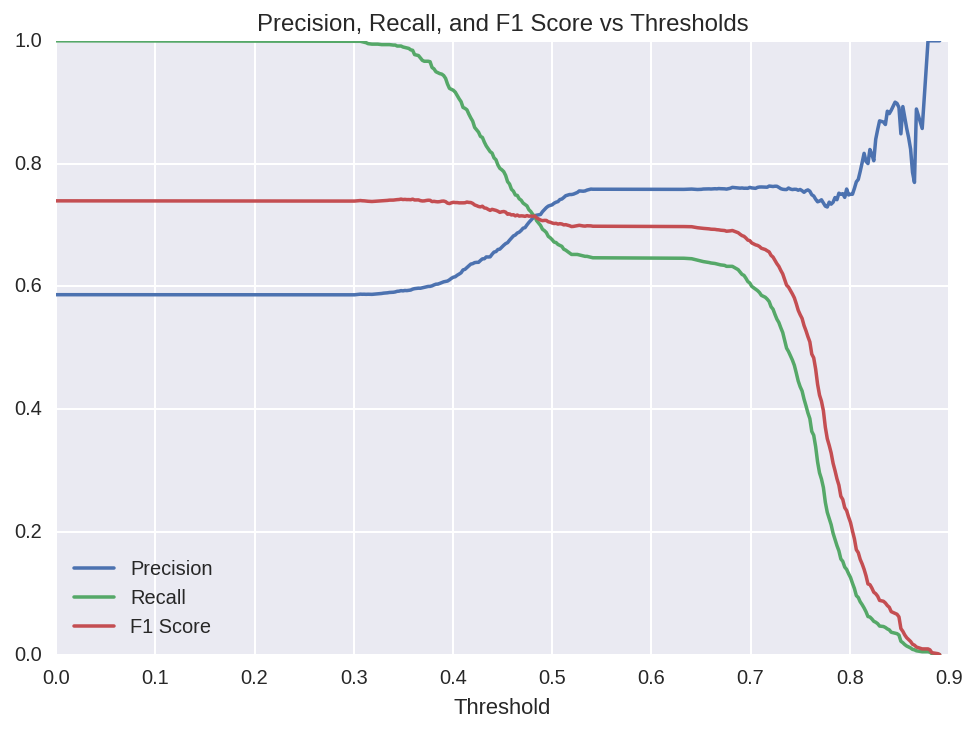

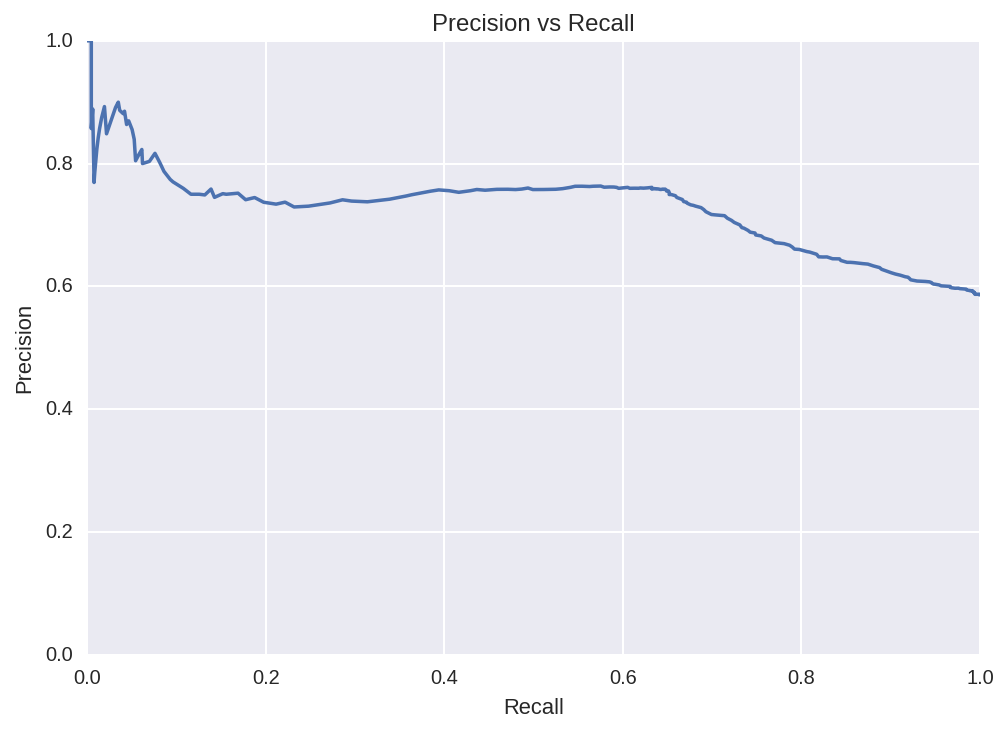

In [200]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted)
thresholds = np.hstack([[0.], thresholds])  # n precisions but n-1 thresholds
f1s = 2 * (precisions * recalls) / (precisions + recalls)

fig = plt.figure()
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.legend(loc='lower left')
plt.xlabel("Threshold"); plt.ylabel(" ")
plt.title("Precision, Recall, and F1 Score vs Thresholds")
    
fig = plt.figure()
plt.plot(recalls, precisions)
#plt.fill_between(recalls, precisions, alpha=0.2)  # AUC value
plt.xlim([0., 1.]); plt.ylim([0., 1.])
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision vs Recall")